# SciPy - Optimize

The scipy.optimize package provides several commonly used optimization algorithms. 

This module contains the following aspects −

- Unconstrained and constrained minimization of multivariate scalar functions (minimize()) using a variety of algorithms (e.g. BFGS, Nelder-Mead simplex, Newton Conjugate Gradient, COBYLA or SLSQP)

- Global (brute-force) optimization routines (e.g., anneal(), basinhopping())

- Least-squares minimization (leastsq()) and curve fitting (curve_fit()) algorithms

- Scalar univariate functions minimizers (minimize_scalar()) and root finders (newton())

- Multivariate equation system solvers (root()) using a variety of algorithms (e.g. hybrid Powell, Levenberg-Marquardt or large-scale methods such as Newton-Krylov)


## Two Variables Rosenbrock Function

https://en.wikipedia.org/wiki/Rosenbrock_function
    
Rosenbrock function is a non-convex function, i.e., function has only one set of optimal solution, not more than one set of optimal solution like non-convex.

It is introduced by Howard H. Rosenbrock in 1960, which is used as a performance test problem for optimization algorithms.

It is also known as Rosenbrock's valley or Rosenbrock's banana function.

The global minimum is inside a long, narrow, parabolic shaped flat valley. To find the valley is trivial. 

To converge to the global minimum, however, is difficult.

The simplified two-variable (x, y) Rosenbrock function is defined as follow:

$$f(x, y) = (a-x)^2 + b (y - x^2)^2$$

It has a globnal minimum at (x, y) = (a, a<sup>2</sup>), where  f(x, y) = 0.

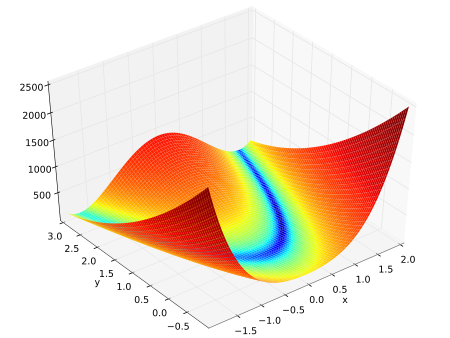

## What is difference between the Convex and Non-Convex Problem?

https://www.researchgate.net/post/What_is_the_difference_between_convex_and_non-convex_optimization_problems
    
The linear programming and nonlinear programming problems are not as general as saying convex and nonconvex optimization problems. 

A convex optimization problem maintains the properties of a linear programming problem and a non convex problem the properties of a non linear programming problem.

The basic difference between the two categories is that in 

a) convex optimization there can be only one (or one set of) optimal solution, which is globally optimal or you might prove that there is no feasible solution to the problem, 

b) non-convex optimization may have multiple (or multiple sets of) locally optimal points and it can take a lot of time to identify whether the problem has no solution or if the solution is global. 

Hence, the efficiency in time of the convex optimization problem is much better. From my experience a convex problem usually is much more easier to deal with in comparison to a non convex problem which takes a lot of time and it might lead you to a dead end.

## Convex Function and Non-Convex (Concave) Function

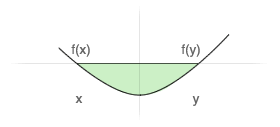

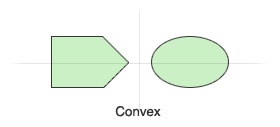

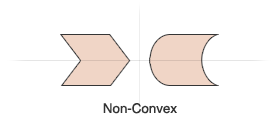
    

 

## Multivariate Rosenbrock Function

https://en.wikipedia.org/wiki/Rosenbrock_function

The minimize() function provides a common interface to unconstrained and constrained minimization algorithms for multivariate scalar functions in scipy.optimize. 

To demonstrate the minimization function, consider the problem of minimizing the Rosenbrock function of the NN (Nueral Network) variables −

$$f(x) = \sum_{i = 1}^{N-1} [100(x_i - x_{i-1}^{2})^{2} + (1-x_i)^{2}]$$

The minimum value of this function is 0, which is achieved when x<sub>i</sub> = 1.

## Nelder–Mead Simplex Algorithm for Rosen Function

https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method

The Nelder-Mead Method is a simplex algorithm with method = 'Nelder-Mead' for the method parameter.

The Nelder–Mead is a direct search method (based on function comparison) used to find the minimum or maximum of an objective function in a multidimensional space. 

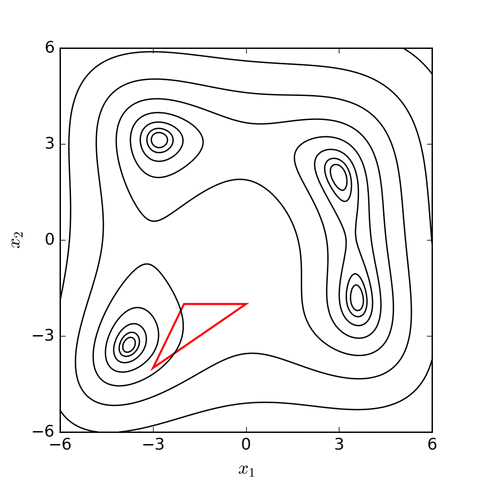

Let us consider the following example.

## Example 1: Minimize with Nelder-Mead Method for Resen Function with Initial Array x0

In [6]:
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der

#def rosen(x):
#    return np.array([100 * (x[1] - x[0]**2)])

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead')

print('res.x:')
print(res.x)

res.x:
[0.99910115 0.99820923 0.99646346 0.99297555 0.98600385]


## Example 2: Minimize with Nelder-Mead Method for Resen Function with Tolerance

In [1]:
from scipy.optimize import minimize, rosen, rosen_der

x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead', tol=1e-12)
print('res.x:')
print(res.x)
# array([ 1.,  1.,  1.,  1.,  1.])

res.x:
[1. 1. 1. 1. 1.]


## Note:
    
The simplex algorithm is probably the way to minimize a fairly well-behaved function. 

It requires only function evaluations and is a good choice for simple minimization problems. 

However, because it does not use any gradient evaluations, it may take longer to find the minimum.

Another optimization algorithm that needs only function calls to find the minimum is the Powell‘s method, which is available by setting method = 'powell' in the minimize() function.

## Minimize with BFGS (Broyden–Fletcher–Goldfarb–Shanno) for Resen Function

https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm
    
BFGS (Broyden–Fletcher–Goldfarb–Shanno) algorithm is an iterative method for solving unconstrained nonlinear optimization problems.

The BFGS method belongs to quasi-Newton methods, a class of hill-climbing optimization techniques that seek a stationary point of a (preferably twice continuously differentiable) function. 

For such problems, a necessary condition for optimality is that the gradient be zero. Newton's method and the BFGS methods are not guaranteed to converge unless the function has a quadratic Taylor expansion near an optimum. 

However, BFGS can have acceptable performance even for non-smooth optimization instances.

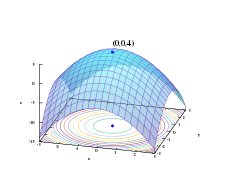

In [13]:
res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'gtol': 1e-6, 'disp': True})
#Optimization terminated successfully.
#         Current function value: 0.000000
#         Iterations: 26
#         Function evaluations: 31
#         Gradient evaluations: 31

print('res.x:')
print(res.x)
# array([ 1.,  1.,  1.,  1.,  1.])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 31
         Gradient evaluations: 31
res.x:
[1. 1. 1. 1. 1.]


## Minimize with SLSQP Method for Object Function with Constraints

SQP (Sequential Quadratic Programming) is an iterative method for constrained nonlinear optimization. 

In SQP method, the Objective Function and the Constraint Functions are continuously differentiable.

SciPy uses method='SLSQP' (Solver for Sequential Quadratic Programming) as for the SQP solver.

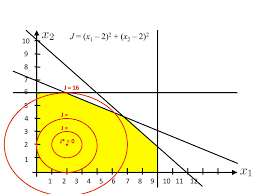


In [30]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
# The objective function:
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

# Constraint funcitons
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

bnds = ((0, None), (0, None))

res = minimize(fun, (2, 0), method='SLSQP', bounds=bnds,
               constraints=cons)
print('res:')
print(res)
print()

print('res.x:')
print(res.x)

res:
     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

res.x:
[1.4 1.7]


## Least Squares

Solve a nonlinear least-squares problem with bounds on the variables. 

Given the residuals f(x) (an m-dimensional real function of n real variables) and the loss function rho(s) (a scalar function), least_squares find a local minimum of the cost function F(x). 

Let us consider the following example.

In this example, we find a minimum of the Rosenbrock function without bounds on the independent variables.

In [29]:
import numpy as np

# Rosenbrock Function
def fun_rosenbrock(x):
   return np.array([10 * (x[1] - x[0]**2), (1 - x[0])])
   
from scipy.optimize import least_squares

input = np.array([2, 2])
res = least_squares(fun_rosenbrock, input)

print('res:')
print(res)
print()
print('res.x:')
print(res.x)

res:
 active_mask: array([0., 0.])
        cost: 9.866924291084687e-30
         fun: array([4.44089210e-15, 1.11022302e-16])
        grad: array([-8.89288649e-14,  4.44089210e-14])
         jac: array([[-20.00000015,  10.        ],
       [ -1.        ,   0.        ]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 3
        njev: 3
  optimality: 8.892886493421953e-14
      status: 1
     success: True
           x: array([1., 1.])

res.x:
[1. 1.]


### Note: 
    
We only provide the Resebrock function (which is the vector of the residuals) as the cost function. 

The Least Sqaure algorithm constructs the cost function as a sum of squares of the Resebrock function (vector of the residuals), which gives the Rosenbrock function. 

The exact minimum is at x = [1.0,1.0].

## Root finding

Let us understand how root finding helps in SciPy.

### Scalar functions

If one has a single-variable equation, there are four different root-finding algorithms, which can be tried. 

Each of these algorithms require the endpoints of an interval in which a root is expected (because the function changes signs). 

In general, brentq is the best choice, but the other methods may be useful in certain circumstances or for academic purposes.

### Fixed-point solving

A problem closely related to finding the zeros of a function is the problem of finding a fixed point of a function. 

A fixed point of a function is the point at which evaluation of the function returns the point: g(x) = x. 
    
Clearly the fixed point of gg is the root of f(x) = g(x)−x. Equivalently, the root of ff is the fixed_point of g(x) = f(x)+x. 

The routine fixed_point provides a simple iterative method using the Aitkens sequence acceleration to estimate the fixed point of gg, if a starting point is given.

### Sets of equations

Finding a root of a set of non-linear equations can be achieved using the root() function. 

Several methods are available, amongst which hybr (the default) and lm, respectively use the hybrid method of Powell and the Levenberg-Marquardt method from the MINPACK.

The following example considers the single-variable transcendental equation.

$$x^2 + 2cos(x) = 0 $$

A root of which can be found as follows 

In [28]:
import numpy as np
from scipy.optimize import root

def func(x):
   return x*2 + 2 * np.cos(x)

sol = root(func, 0.3)
print('sol:')
print(sol)
print()
print('sol.x:')
print(sol.x)

sol:
    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.77666778e-12])
       r: array([-3.3472241])
  status: 1
 success: True
       x: array([-0.73908513])

sol.x:
[-0.73908513]
